In [1]:
#Rahmatul Fajri
#Mahasiswa S1 Teknik Informatika
#Universitas Pertahanan

In [2]:
 !wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

--2021-06-29 06:26:49--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M  8.06MB/s    in 77s     

2021-06-29 06:28:07 (3.99 MB/s) - ‘rockpaperscissors.zip’ saved [322873683/322873683]



In [4]:
import os
import zipfile
lcl_zip = '/content/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(lcl_zip, 'r')
zip_ref.extractall('/content/')
zip_ref.close()

In [5]:
#cek jumlah total dari gambar
import os
_gunting = os.path.join('/content/rockpaperscissors/scissors')
_batu = os.path.join('/content/rockpaperscissors/rock')
_kertas = os.path.join('/content/rockpaperscissors/paper')

print('Banyaknya gambar gunting:\t', len(os.listdir(_gunting)))
print('Banyaknya gambar batu:\t', len(os.listdir(_batu)))
print('Banyaknya gambar kertas:\t', len(os.listdir(_kertas)))

Banyaknya gambar gunting:	 750
Banyaknya gambar batu:	 726
Banyaknya gambar kertas:	 712


In [22]:
#image generator
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
BASIS_DIR = '/content/rockpaperscissors/rps-cv-images'
training_datagenerator = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split = 0.4
)

In [23]:
train_generator = training_datagenerator.flow_from_directory(
  BASIS_DIR,
  target_size=(150,150),
  class_mode = 'categorical',
  shuffle=True,
  subset='training'
)

validation_generator = training_datagenerator.flow_from_directory(
  BASIS_DIR,
  target_size=(150,150),
  class_mode = 'categorical',
  shuffle=True,
  subset='validation'
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [24]:
#Membangun model Squential
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16,(3,3), activation='relu', input_shape=(150, 150, 3)),
  tf.keras.layers.MaxPooling2D(2,2),

  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.5),

  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(3, activation='softmax')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9248)             

In [25]:
#komilasi
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])

In [26]:
#Melatih CNN
history=model.fit(
    train_generator,
    steps_per_epoch=4,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=4,
    verbose=2
)

Epoch 1/100
4/4 - 6s - loss: 1.1323 - accuracy: 0.2969 - val_loss: 1.1012 - val_accuracy: 0.3516
Epoch 2/100
4/4 - 5s - loss: 1.1045 - accuracy: 0.3203 - val_loss: 1.1106 - val_accuracy: 0.2969
Epoch 3/100
4/4 - 5s - loss: 1.0960 - accuracy: 0.3672 - val_loss: 1.1030 - val_accuracy: 0.2734
Epoch 4/100
4/4 - 5s - loss: 1.0896 - accuracy: 0.3906 - val_loss: 1.1326 - val_accuracy: 0.2578
Epoch 5/100
4/4 - 5s - loss: 1.1099 - accuracy: 0.3594 - val_loss: 1.0967 - val_accuracy: 0.3672
Epoch 6/100
4/4 - 4s - loss: 1.1011 - accuracy: 0.3265 - val_loss: 1.1067 - val_accuracy: 0.2969
Epoch 7/100
4/4 - 5s - loss: 1.1016 - accuracy: 0.2656 - val_loss: 1.0938 - val_accuracy: 0.3594
Epoch 8/100
4/4 - 5s - loss: 1.1000 - accuracy: 0.2812 - val_loss: 1.0909 - val_accuracy: 0.4766
Epoch 9/100
4/4 - 5s - loss: 1.0923 - accuracy: 0.3984 - val_loss: 1.0824 - val_accuracy: 0.4062
Epoch 10/100
4/4 - 5s - loss: 1.0865 - accuracy: 0.3516 - val_loss: 1.0685 - val_accuracy: 0.4297
Epoch 11/100
4/4 - 5s - loss:

Saving DpuTr8KvePPqWO5Q.png to DpuTr8KvePPqWO5Q.png
DpuTr8KvePPqWO5Q.png
Tangan Ini adalah bentuk GUNTING


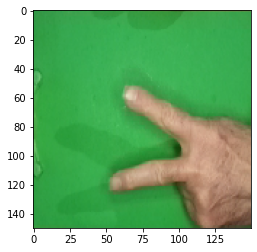

In [30]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt

uploaded = files.upload()
for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  if classes[0][0]==1:
    print('Tangan Ini adalah bentuk KERTAS')                                
  elif classes[0][1]==1:
    print('Tangan Ini adalah bentuk BATU')                                 
  elif classes[0][2]==1:
    print('Tangan Ini adalah bentuk GUNTING')                              
  else:
    print('Maaf, Tidak Diketahui')                                                    